GETTING STARTED WITH PANDA SQL
======================================

**Dataset Description
Overview**

The titanic data has been split into two groups:

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. 

**Data Dictionary**
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


Size
80 kB

Type
dataframe object


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [3]:
#Downloading Panda SQL Library
!pip3 install pandasql

In [8]:
#Importing Data Set form Seaborn Library
titanic = pd.read_csv("titanic.csv")
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
'''Here q is a required parameter that takes in a SQL query as a string,
and env—an optional (and rarely useful) parameter that can be either locals() or globals() 
and allows sqldf to access the corresponding set of variables in your Python environment.'''

from pandasql import sqldf
pysqldf = lambda q: sqldf(q,globals())

In [10]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
desc_order=pysqldf("""SELECT DISTINCT PassengerId, name FROM titanic ORDER BY PassengerId DESC LIMIT 5""")
desc_order

,PassengerId,Name
0,891,"Dooley, Mr. Patrick"
1,890,"Behr, Mr. Karl Howell"
2,889,"Johnston, Miss. Catherine Helen ""Carrie"""
3,888,"Graham, Miss. Margaret Edith"
4,887,"Montvila, Rev. Juozas"


In [10]:
#for visualizing basic information about my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.duplicated().sum()

107

In [11]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,1,0,19.0,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,NaN,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,1,26.0,0,0,30.0000,0,0,1,1,2,0,1,1


In [15]:
#Replacing Null Values in the Age,Embarked,deck and embark_town columns
df["age"].fillna(df["age"].mean(),inplace= True)
df["embarked"].fillna(df["embarked"].mean(),inplace= True)
df["deck"].fillna(df["deck"].mode().iloc[0],inplace=True)
df["embark_town"].fillna(df["embark_town"].mode().iloc[0],inplace=True)

In [16]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,7,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,7,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


In [17]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

<AxesSubplot:>

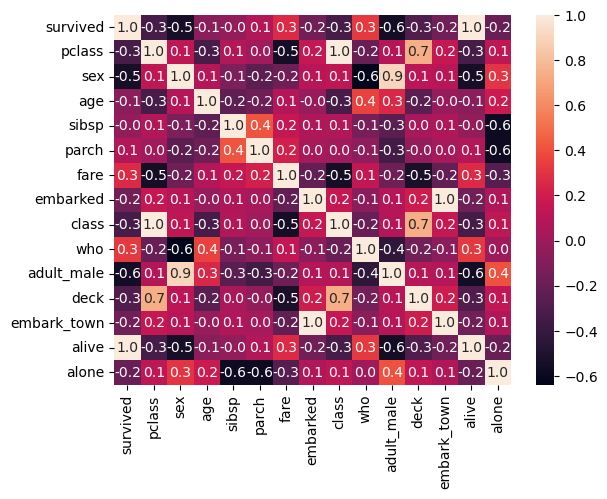

In [26]:
sns.heatmap(df.corr(),annot=True,linewidths=0,fmt=".1f")


array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

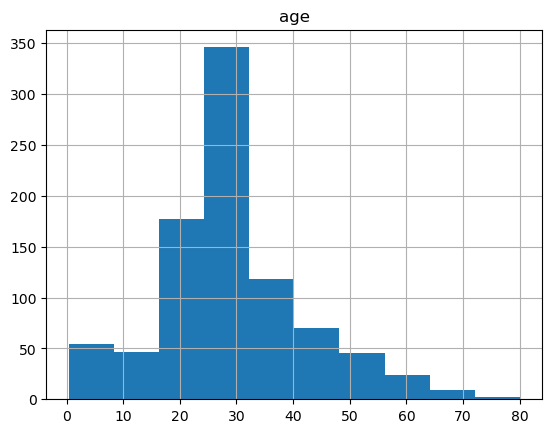

In [33]:
#This graph seems to be symmetrical about the peak of the histogram
df.hist("age")

<AxesSubplot:xlabel='fare', ylabel='Density'>

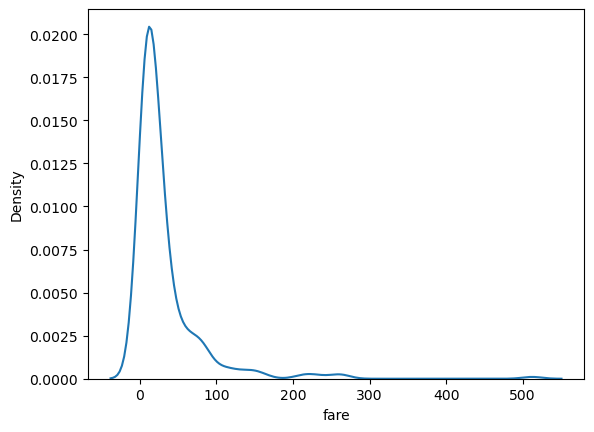

In [35]:
#A kde plot depicts the probability density at different values in a continuous variable.The graph shows a normal/symmetrical
#sign
sns.kdeplot(df['fare'])

## THE DATA SET IS NOW SPLITTED INTO 2 PARTS:
    X=> which displays the feature/predictor variables and
    Y=> which displays the target/response variable

In [38]:
X=df.drop("survived",axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,7,2,0,0
1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,7,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,7,2,0,1


In [40]:
Y= df["survived"].copy()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [57]:
fast_breath=pysqldf("""
SELECT *,CASE 
      WHEN (fast_breath=1 and b1_fast_breath='1') THEN '1'
      WHEN (fast_breath=1 and b1_fast_breath='0') THEN '2'
      WHEN (fast_breath=0 and b1_fast_breath='1') THEN '3'
      WHEN (fast_breath=0 and b1_fast_breath='0') THEN '4'
   END AS fast_breath_cat FROM data"""

In [58]:
SELECT *,CASE 
     
      WHEN SUM(b1_fast_breath)+SUM(b1_chest_indraw)+SUM(b1_high_body_temp)>=2 THEN '1'
      WHEN SUM(b1_fast_breath)+SUM(b1_chest_indraw)+SUM(b1_high_body_temp) THEN '2' 
  
   END AS low_persistant_sign FROM rct2_persistant_sign""") 
low_mort_persist

Accuracy: 100.00%


In [62]:
final_plot_data=pysqldf("""select *,
  ROW_NUMBER() Over (Order by participant_id) As [S.N.]   
from RCT2_no_sign""")
final_plot_data

Accuracy:100.00%


In [65]:
final_plot_data=pysqldf("""select *,
  ROW_NUMBER() Over (Order by participant_id) As [S.N.]   
from RCT2_no_sign""")
final_plot_data

array([[1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       [1.00000000e+00, 2.22044605e-16],
       ...,
       [1.00000000e+00, 2.22044605e-16],
       [2.22044605e-16, 1.00000000e+00],
       [1.00000000e+00, 2.22044605e-16]])